In [3]:
import sys

# 사이킷런 ≥0.20 필수
import sklearn

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import platform
from matplotlib import font_manager, rc

#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "clustering"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [4]:
# 샘플 데이터 생성
from sklearn.datasets import make_blobs

# 200개의 데이터 생성, feature - 2개, 중심은 3개 (3개의 그룹으로 나눔, 표준편차는 0.8을 적용)
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=42)

print(X.shape, y.shape)

(200, 2) (200,)


In [5]:
unique, counts = np.unique(y, return_counts=True)
print(unique)
print(counts)

[0 1 2]
[67 67 66]


In [6]:
# 위에서 생성한 feature - ftr'n'

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head()

,ftr1,ftr2,target
0,6.132498,2.352236,1
1,-4.604994,9.671808,0
2,-6.889425,-7.597913,2
3,-8.038095,-8.006081,2
4,-7.351119,-6.200428,2


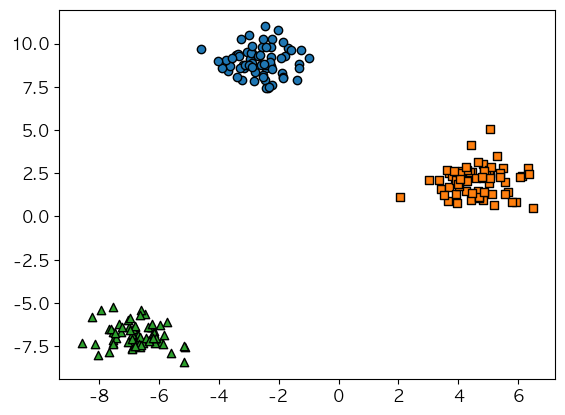

In [7]:
# 데이터 분포 확인

target_list = np.unique(y)

markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )

plt.show()

In [8]:
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
print(y_pred)
print(y)

[2 0 1 1 1 1 0 1 2 1 2 2 2 2 2 1 0 1 2 1 2 2 1 0 1 0 0 1 0 2 2 2 1 1 0 0 1
 0 1 0 2 0 1 2 1 2 2 1 2 0 1 0 1 0 0 0 1 2 0 2 1 0 1 1 1 1 0 0 1 0 0 1 0 2
 0 2 2 0 2 0 0 2 2 1 1 1 1 0 2 1 2 0 0 0 2 1 0 2 2 0 1 1 0 1 0 2 1 2 2 1 2
 2 0 1 0 1 1 0 0 0 1 2 0 1 1 2 0 0 2 0 2 1 0 1 1 2 2 2 0 2 0 0 1 2 2 0 2 1
 1 2 0 1 2 1 2 1 1 0 2 2 0 2 2 1 0 2 2 0 1 2 1 0 2 1 0 2 0 0 0 2 0 2 1 1 1
 0 2 2 2 0 0 2 1 1 0 1 0 0 2 2]
[1 0 2 2 2 2 0 2 1 2 1 1 1 1 1 2 0 2 1 2 1 1 2 0 2 0 0 2 0 1 1 1 2 2 0 0 2
 0 2 0 1 0 2 1 2 1 1 2 1 0 2 0 2 0 0 0 2 1 0 1 2 0 2 2 2 2 0 0 2 0 0 2 0 1
 0 1 1 0 1 0 0 1 1 2 2 2 2 0 1 2 1 0 0 0 1 2 0 1 1 0 2 2 0 2 0 1 2 1 1 2 1
 1 0 2 0 2 2 0 0 0 2 1 0 2 2 1 0 0 1 0 1 2 0 2 2 1 1 1 0 1 0 0 2 1 1 0 1 2
 2 1 0 2 1 2 1 2 2 0 1 1 0 1 1 2 0 1 1 0 2 1 2 0 1 2 0 1 0 0 0 1 0 1 2 2 2
 0 1 1 1 0 0 1 2 2 0 2 0 0 1 1]


In [11]:

from scipy import stats

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode] = class_id

mapping

{0: 0, 2: 1, 1: 2}